# CreditCard Fraud Detection

## Add Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 


### Load Data

In [2]:
data = pd.read_csv('creditcard.csv')

df = pd.DataFrame(data)

In [3]:
df.shape

(284807, 31)

In [4]:
df # 0 - not fraud
   # 1 - fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
X = df.iloc[ :, 1:30]    # creating X ( feature variables)

In [6]:
t = df.iloc[543,1:30]
t = pd.DataFrame(t)   # Taking one row out for later manual prediction 
t

,543
V1,-0.918109
V2,0.798542
V3,1.753494
V4,-0.576985
V5,-0.554780
V6,0.119542
V7,1.096153
V8,-0.114591
V9,-0.213291
V10,-0.742607


In [7]:
X   # features of our dataset converted to vectors 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
y = df['Class']  # target variable

## Data Visualization

In [9]:
%pip install seaborn
import seaborn as sns  # installing Seaborn for data visuallization


Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Class', ylabel='Count'>

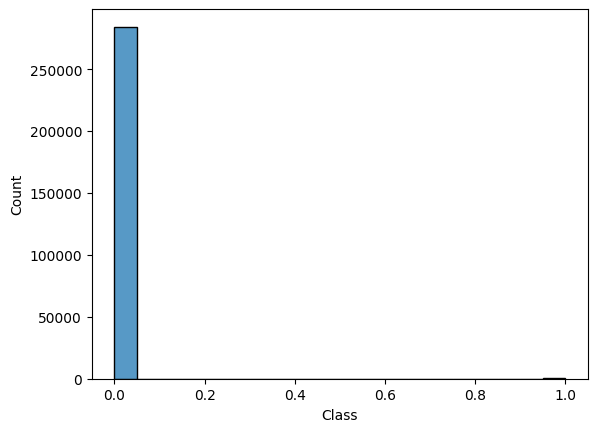

In [10]:
sns.histplot(y)
                                 # count of 0 and 1 value  ,   The data has very less target variable as 1 but still it predicts right values

In [11]:
import matplotlib.pyplot as plt


<Axes: >

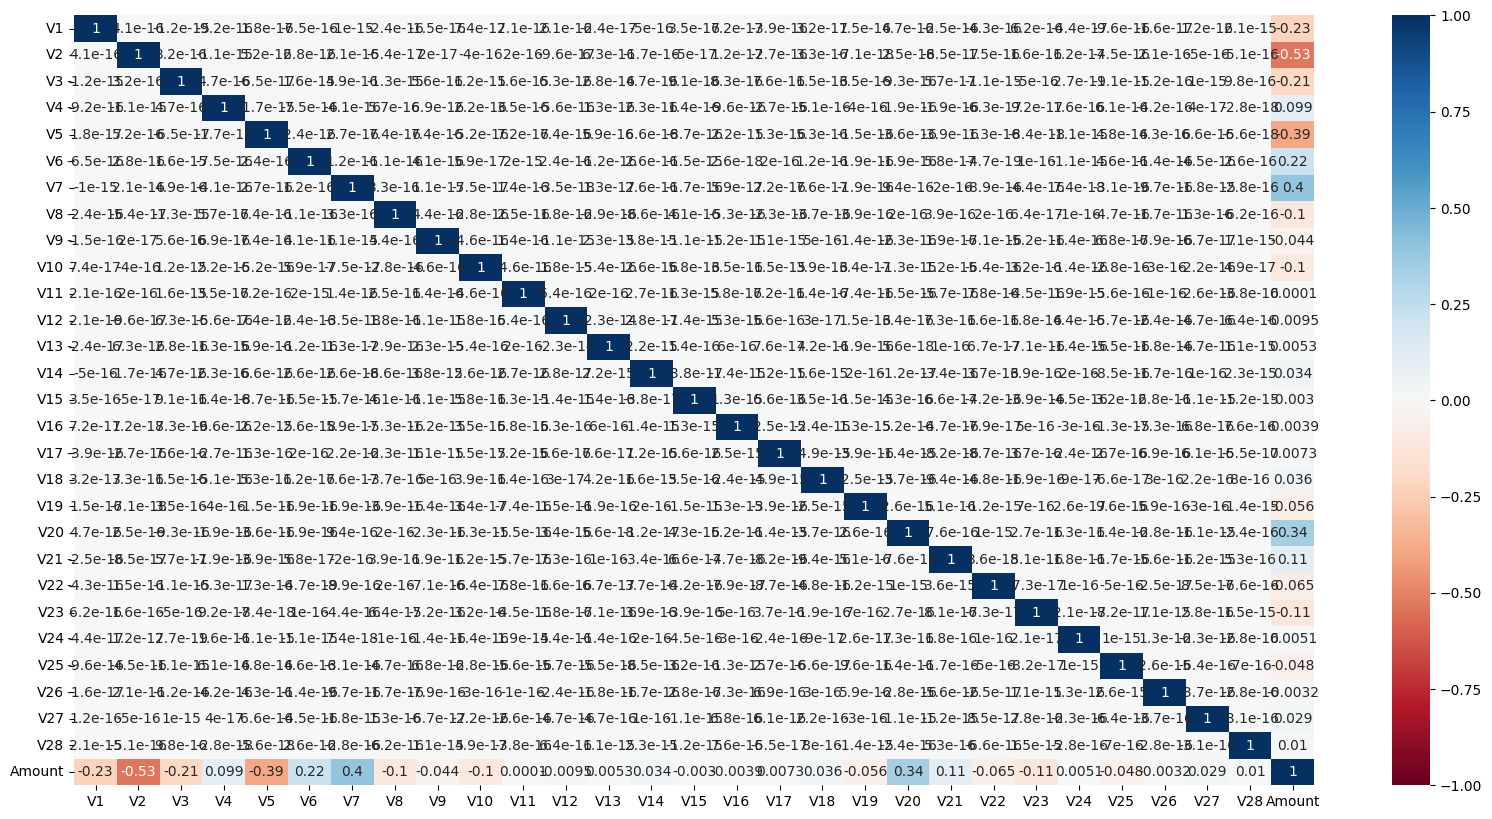

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),cmap='RdBu',vmin=-1,vmax=1,annot=True) # Correlation matrix  with anootation values 


<Axes: >

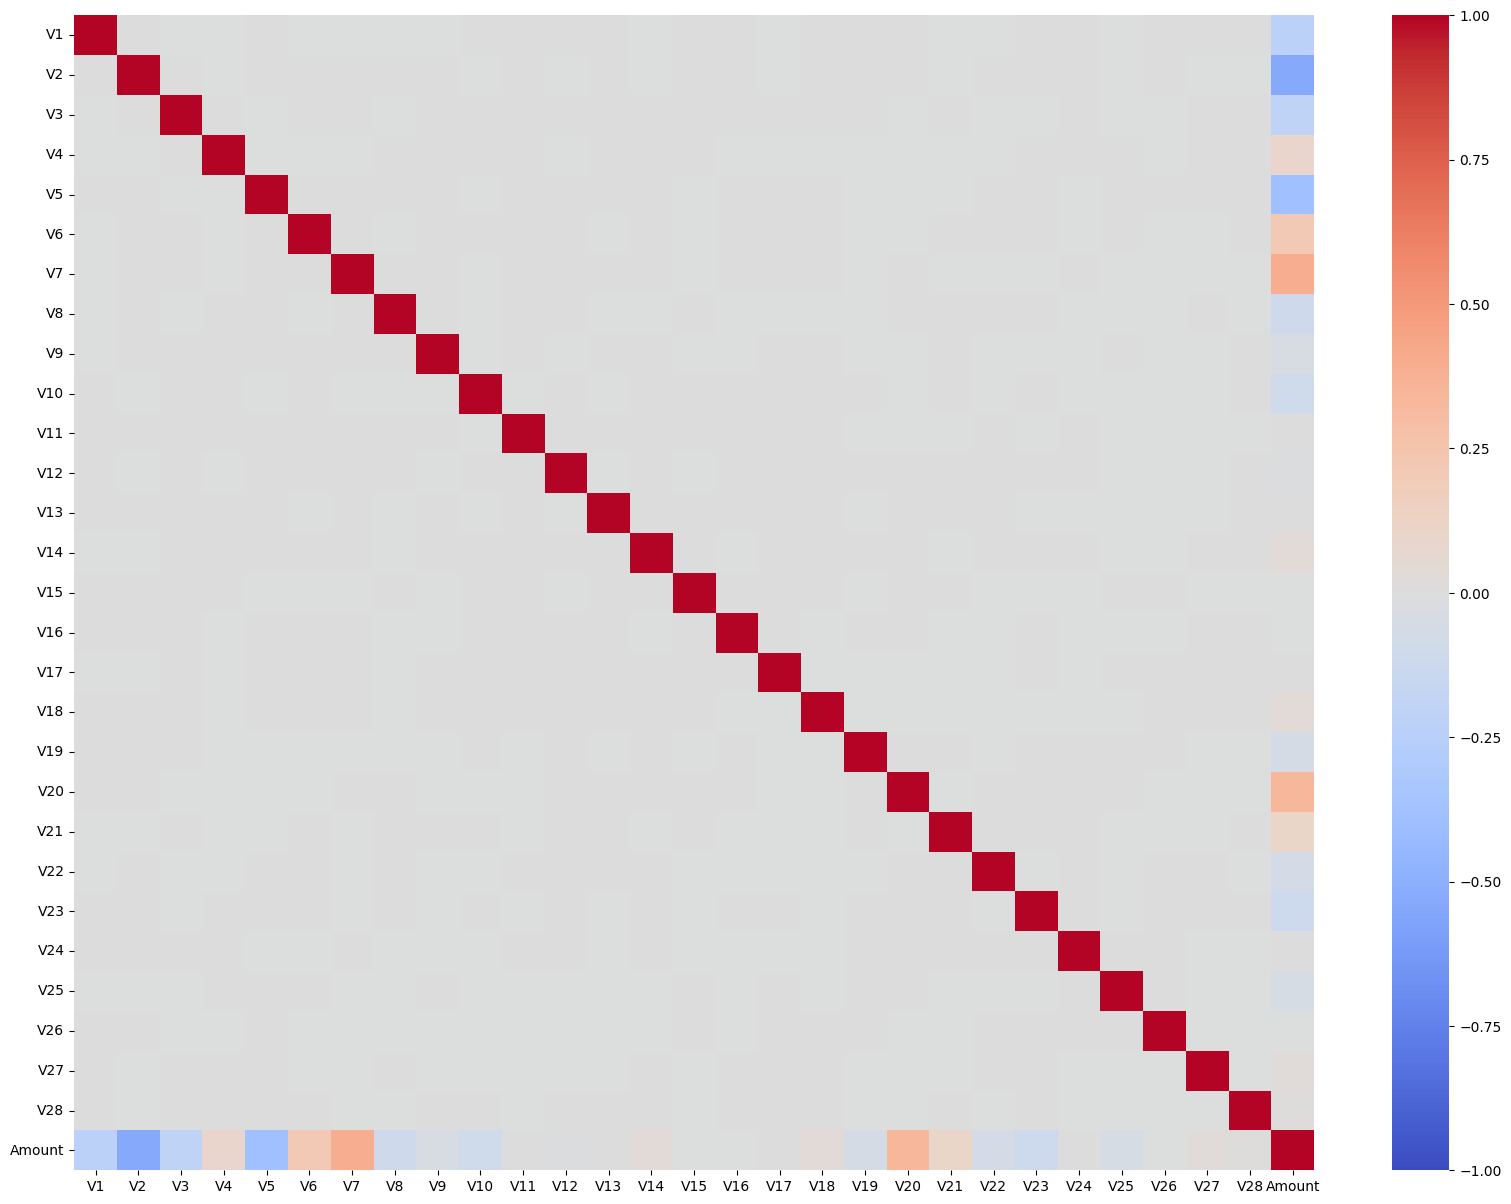

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=False) # without anootation values but only colors 


In [14]:
corr = X.corr()
corr.shape

(29, 29)

In [15]:
matrix = np.triu(corr)

<Axes: >

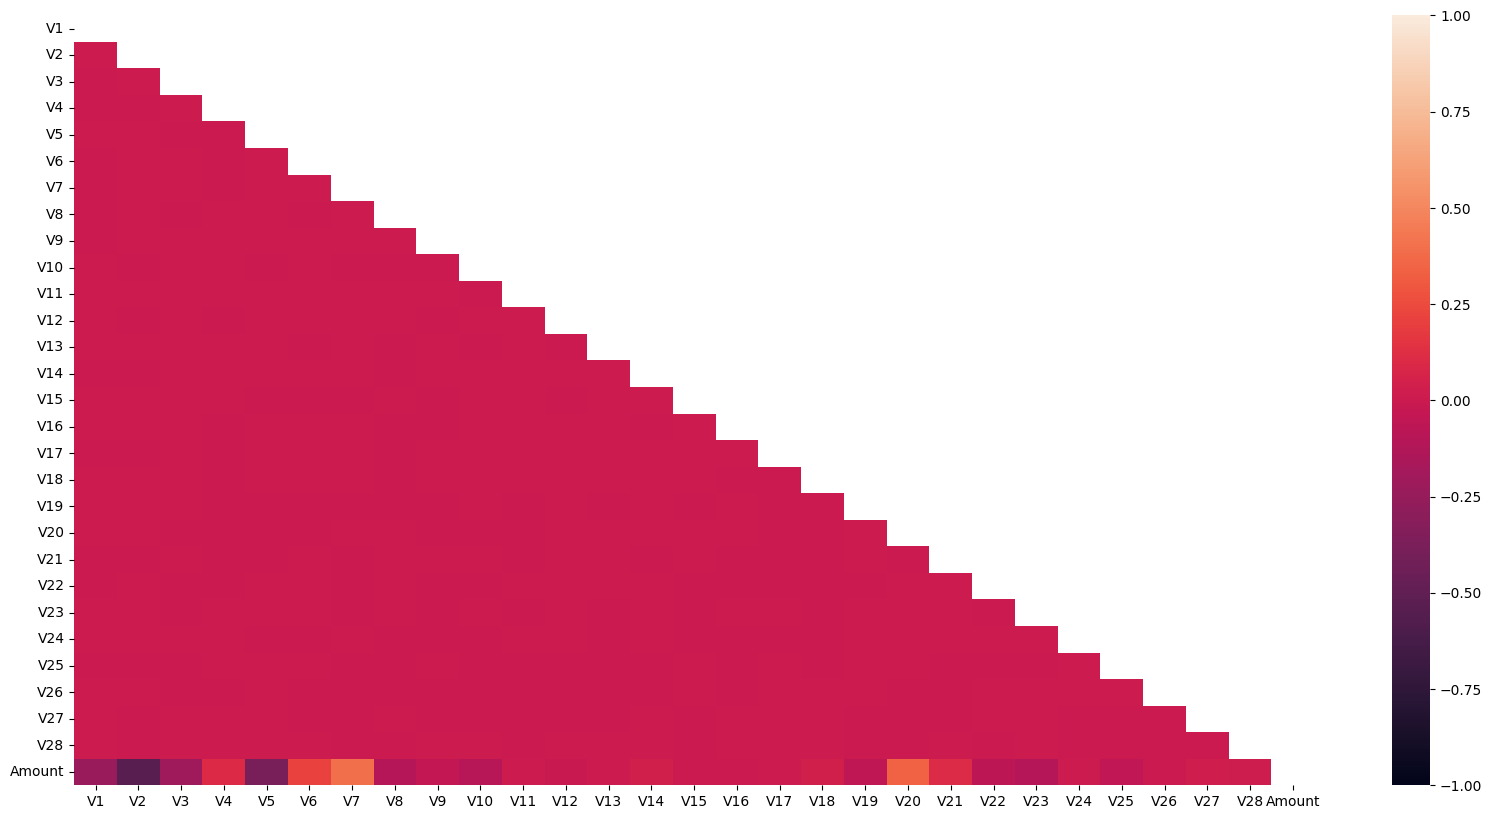

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),mask=matrix,vmin=-1,vmax=1,annot=False)


## Model Building

In [17]:
from sklearn.linear_model import LogisticRegression   #Using LogisticRegreesion model for prediction
from sklearn.metrics import *

In [18]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=20) #splitting data 

In [19]:
X_train.shape

(170884, 29)

In [20]:
Y_train.shape


(170884,)

### Logistic Regression

In [21]:
lr = LogisticRegression(solver='newton-cholesky',max_iter=50)   #using solver Newton-Cholesky as the data is very large for smal dataset we take saga there are many like lbfgs
lr.fit(X_train,Y_train)
y_pred = lr.predict(x_test)

In [22]:

reshaped_t= t.values.reshape(1,-1)

In [23]:
t = pd.DataFrame(reshaped_t)

In [24]:
t  #the separted one frame for manual testing created by  taking one row  and reshaping it 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.918109,0.798542,1.753494,-0.576985,-0.55478,0.119542,1.096153,-0.114591,-0.213291,-0.742607,...,-0.205695,0.050748,0.201314,0.023568,0.107428,-0.464466,0.004938,-0.068013,0.093834,146.25


In [25]:
t_pred = lr.predict(t)  #prediction 

c:\Users\TEJAS\.conda\envs\genere\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
t_pred

array([0], dtype=int64)

In [27]:
accuracy = accuracy_score(y_pred,y_test)  # accuracy of model 


### Confusion Matrix For LogisticRegression

In [28]:
cm  = confusion_matrix(y_test,y_pred,labels=lr.classes_)

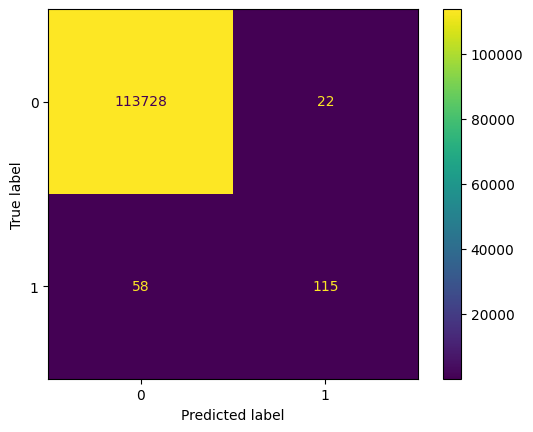

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [30]:
accuracy

0.9992977713016686

In [31]:
report = classification_report(y_pred,y_test)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113786
           1       0.66      0.84      0.74       137

    accuracy                           1.00    113923
   macro avg       0.83      0.92      0.87    113923
weighted avg       1.00      1.00      1.00    113923



In [32]:
precision_score(y_pred,y_test)

0.6647398843930635

#### SVM  (Support Vector Machines)

In [33]:
from sklearn import svm


SVM = svm.SVC(kernel='sigmoid', degree=3, gamma='auto',max_iter=-1, random_state=12)

In [34]:
SVM.fit(X_train,Y_train)

SVC(gamma='auto', kernel='sigmoid', random_state=12)

In [35]:
y_pred_svm = SVM.predict(x_test)

In [36]:
accuracy_score(y_pred_svm,y_test)

0.9974105316749032

In [37]:
cm1 = confusion_matrix(y_test,y_pred_svm,labels=SVM.classes_)

### Confusion Matrix for SVM


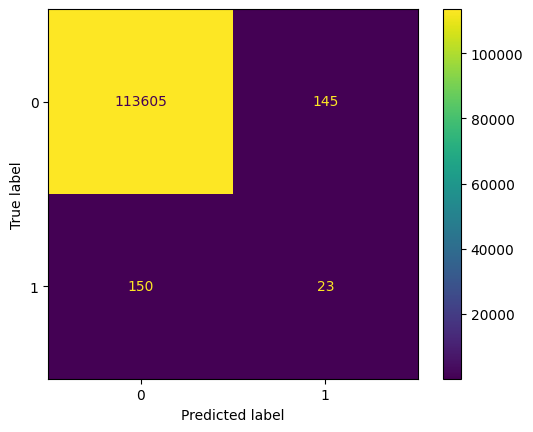

In [38]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp1.plot()
plt.show()

In [39]:
t_svm_pred = SVM.predict(t)

c:\Users\TEJAS\.conda\envs\genere\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [40]:
precision_score(y_pred_svm,y_test)

0.1329479768786127

In [41]:
print(t_svm_pred)

[0]


## ExtratreesClasifier

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_etc_pred = etc.predict(x_test)
accuracy_etc = accuracy_score(y_etc_pred,y_test)
confusion_matrix_etc = confusion_matrix(y_etc_pred,y_test)

print(confusion_matrix_etc)

[[113744     46]
 [     6    127]]


### Confusion Matrix for ExtratreesClassifier

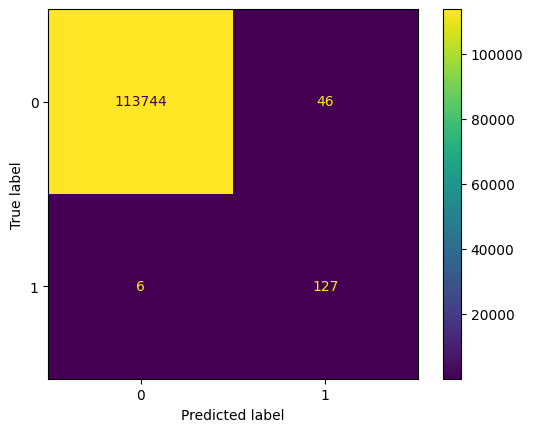

In [44]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_etc,display_labels=etc.classes_)
disp1.plot()
plt.show()

In [46]:
etc_classification_report = classification_report(y_etc_pred,y_test)

In [47]:
print(etc_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113790
           1       0.73      0.95      0.83       133

    accuracy                           1.00    113923
   macro avg       0.87      0.98      0.91    113923
weighted avg       1.00      1.00      1.00    113923



### SAVE Model

In [48]:
#from sklearn.externals import joblib

import joblib
joblib.dump(SVM, 'SVM_CreditCardFraud.pkl') 
joblib.dump(lr, 'logisticregression_CreditCardFraud.pkl') 
joblib.dump(etc, 'Extratreeclassifier_CreditCardFraud.pkl') 



['Extratreeclassifier_CreditCardFraud.pkl']

### and later we can load it by '{model = joblib.load('filename.pkl')}'